In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mn
from scipy.stats import skew

In [2]:
#importing data
from google.colab import files
uploaded = files.upload()

Saving monet.csv to monet.csv


In [3]:
# Read Data 
import io
data = pd.read_csv('monet.csv')

In [4]:
data.head()


,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [5]:
data.tail()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
425,5.2825,25.6,39.4,1,375,1
426,9.3525,25.9,39.6,1,375,2
427,8.2525,25.6,39.6,1,375,1
428,3.4100,25.6,39.4,1,386,2
429,1.5425,25.7,32.0,1,387,1


In [6]:
#checking the dimensions of dataset 
data.shape

(430, 6)

In [7]:
#checking for the datatypes, non-null counts and columnname
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


In [8]:
#Checking statistics of dataset 
data.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


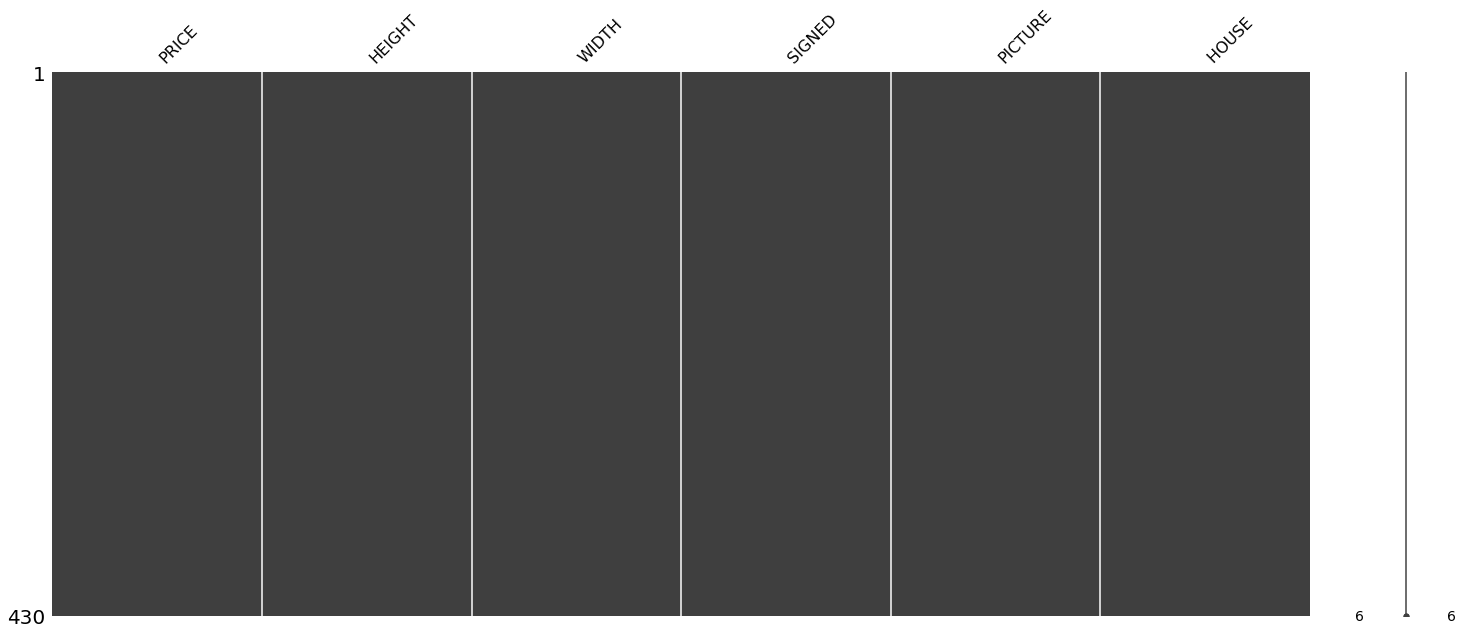

In [9]:
#checking for missing values
mn.matrix(data)

In [10]:
# Creating size column
data['SIZE'] = data['HEIGHT']*data['WIDTH']

In [11]:
data.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


In [12]:
#Checking for skewness
for column in data.columns:
  if data.dtypes[column] != np.object:
    print(column ,' = ' , skew(data[column], axis=0, bias=True, nan_policy='omit'))

PRICE  =  2.8309820163618893
HEIGHT  =  1.8263892242940685
WIDTH  =  2.048113094558297
SIGNED  =  -1.674080612166068
PICTURE  =  0.07007980158027305
HOUSE   =  0.3733324102363447
SIZE  =  3.8831941413460154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Log transformation

to_be_transformed = ['PRICE','HEIGHT','WIDTH','SIZE']
data_log = data[to_be_transformed].applymap(lambda x: np.log(x+1))



In [14]:
# columns renaming
data_log.columns = 'log_' + data_log.columns

In [15]:
#Checking Skewness of log attributes
data_log.skew()

log_PRICE     0.837605
log_HEIGHT   -0.469233
log_WIDTH    -0.590784
log_SIZE     -0.824549
dtype: float64

In [16]:
data_log

,log_PRICE,log_HEIGHT,log_WIDTH,log_SIZE
0,1.608193,3.104587,3.280911,6.303132
1,2.282382,3.493473,3.280911,6.706422
2,0.123716,2.066863,2.827314,4.706914
3,1.111035,3.284664,3.496508,6.713442
4,0.911278,3.284664,3.496508,6.713442
...,...,...,...,...
425,1.837768,3.280911,3.698830,6.917349
426,2.337228,3.292126,3.703768,6.934047
427,2.224894,3.280911,3.703768,6.922407
428,1.483875,3.280911,3.698830,6.917349


In [17]:
# Concatenating original and log transformed data
monetdataset=pd.concat([data,data_log],axis=1)

In [18]:
monetdataset

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE,log_PRICE,log_HEIGHT,log_WIDTH,log_SIZE
0,3.993780,21.3,25.6,1,1,1,545.28,1.608193,3.104587,3.280911,6.303132
1,8.800000,31.9,25.6,1,2,2,816.64,2.282382,3.493473,3.280911,6.706422
2,0.131694,6.9,15.9,0,3,3,109.71,0.123716,2.066863,2.827314,4.706914
3,2.037500,25.7,32.0,1,4,2,822.40,1.111035,3.284664,3.496508,6.713442
4,1.487500,25.7,32.0,1,4,2,822.40,0.911278,3.284664,3.496508,6.713442
...,...,...,...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64,1.837768,3.280911,3.698830,6.917349
426,9.352500,25.9,39.6,1,375,2,1025.64,2.337228,3.292126,3.703768,6.934047
427,8.252500,25.6,39.6,1,375,1,1013.76,2.224894,3.280911,3.703768,6.922407
428,3.410000,25.6,39.4,1,386,2,1008.64,1.483875,3.280911,3.698830,6.917349


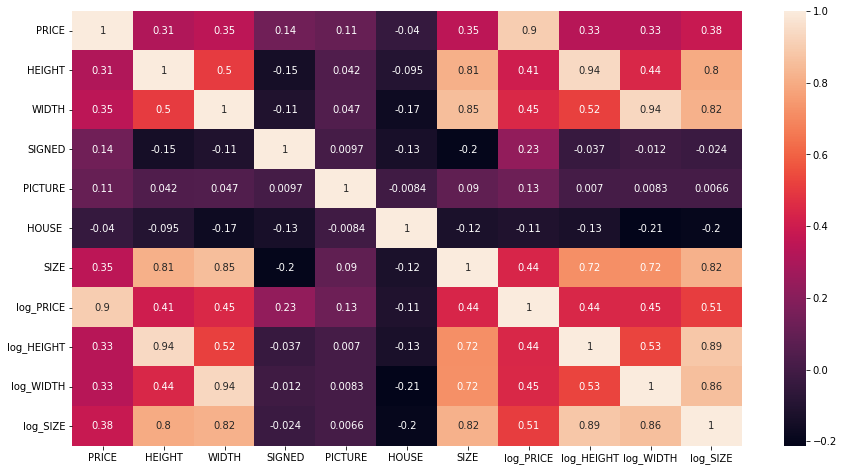

In [19]:
# Finding correlation matrix in all variables
fig, ax = plt.subplots(figsize=(15,8))
sb.heatmap(monetdataset.corr(), annot=True)

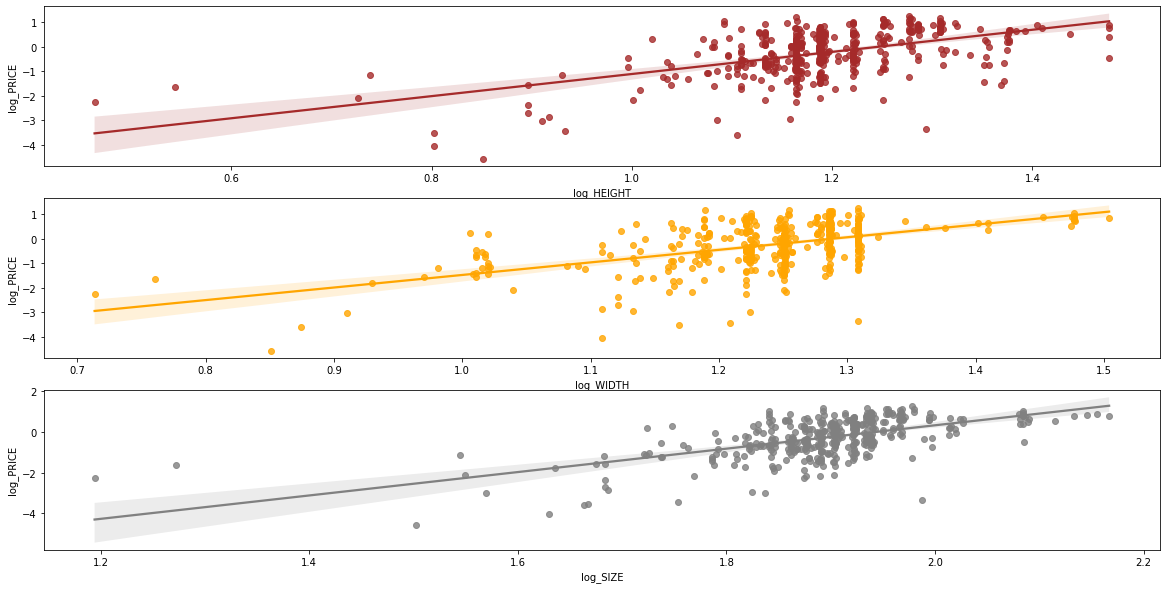

In [20]:
# Converting numerical features into log normal values
#Relation between IV and DV
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
sb.regplot(x='log_HEIGHT',y='log_PRICE',data=monetdataset.apply(np.log), scatter=True, fit_reg=True, ax=ax1, color='brown')
sb.regplot(x='log_WIDTH',y='log_PRICE',data=monetdataset.apply(np.log), scatter=True, fit_reg=True, ax=ax2, color='orange')
sb.regplot(x='log_SIZE',y='log_PRICE',data=monetdataset.apply(np.log), scatter=True, fit_reg=True, ax=ax3, color='grey')

In [21]:
#importing libraries
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [22]:
# Simple Linear Regression model 1

X = monetdataset[['log_HEIGHT']].values
y= monetdataset['log_PRICE'].values

In [23]:
#Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
lr_model1 = linear_model.LinearRegression()
lr_model1.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr_model1.predict(X_test)

In [26]:
price_data = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_data

,Actual Price,Predicted Price
0,0.646056,1.012690
1,0.634458,0.490241
2,0.566889,1.065961
3,0.301585,0.748035
4,1.556564,1.012690
...,...,...
103,1.458615,1.012690
104,1.098612,1.209314
105,0.266094,0.588152
106,2.865996,0.738823


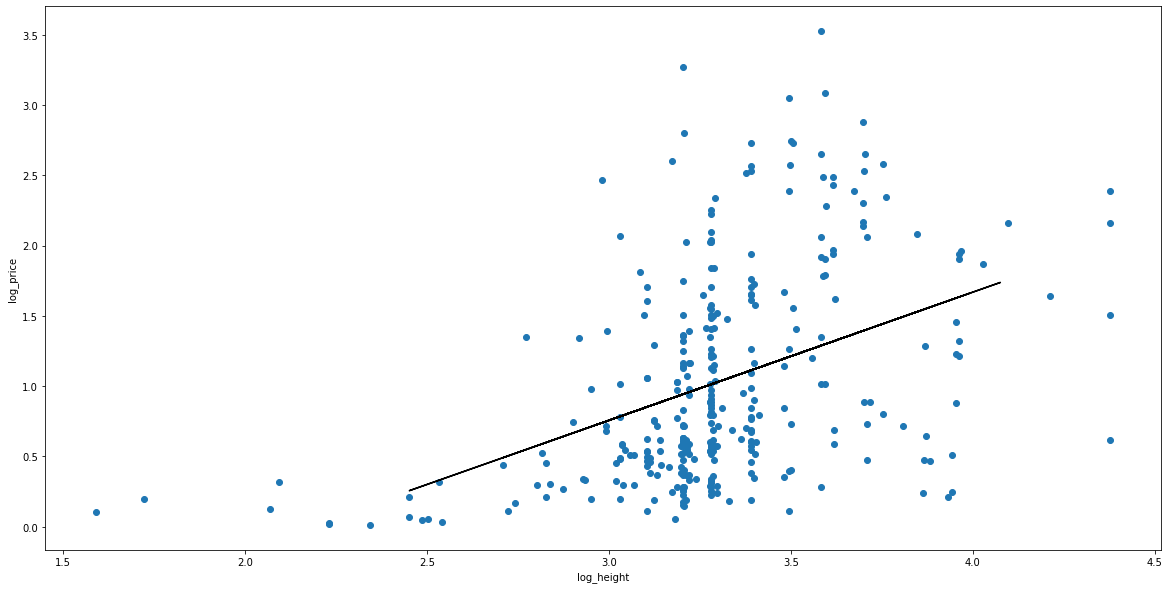

In [27]:
# Linear Regression plot for this model 1
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'black')
plt.xlabel("log_height")
plt.ylabel("log_price")
plt.show()

In [28]:
# Calculating RMSE
import sklearn.metrics as metrics
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.7241978635131306


In [29]:
# Checcking mean absolute error

mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)

0.5744860226075414


In [30]:
# Simple Linear Regression model 2
X = monetdataset[['log_SIZE']].values
y= monetdataset['log_PRICE'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [32]:
lr_model2 = linear_model.LinearRegression()
lr_model2.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr_model2.predict(X_test)

In [34]:
price_data = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_data

,Actual Price,Predicted Price
0,0.646056,1.189646
1,0.634458,0.596115
2,0.566889,1.179432
3,0.301585,0.695389
4,1.556564,1.138545
...,...,...
103,1.458615,1.134990
104,1.098612,1.065428
105,0.266094,0.669964
106,2.865996,0.791604


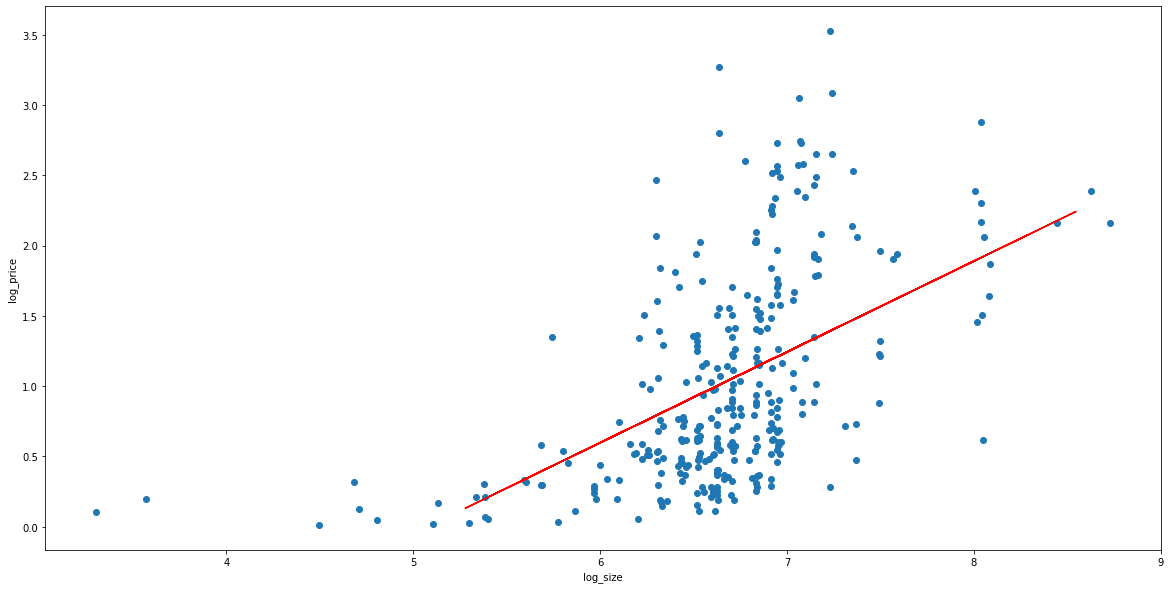

In [35]:
# Linear Regression plot for this model 2
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel("log_size")
plt.ylabel("log_price")
plt.show()

In [36]:
#Checking RMSE
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.7242002612492014


In [37]:
#Checking Mean Absolute error
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)

0.5686707923594233


In [38]:
# Simple Linear Regression model 3

X = monetdataset[['log_WIDTH']].values
y= monetdataset['log_PRICE'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
lr_model3 = linear_model.LinearRegression()
lr_model3.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = lr_model3.predict(X_test)

In [42]:
price_data = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_data

,Actual Price,Predicted Price
0,0.646056,1.325829
1,0.634458,0.967305
2,0.566889,1.239031
3,0.301585,0.803271
4,1.556564,1.235920
...,...,...
103,1.458615,1.229672
104,1.098612,0.856246
105,0.266094,0.967305
106,2.865996,0.982893


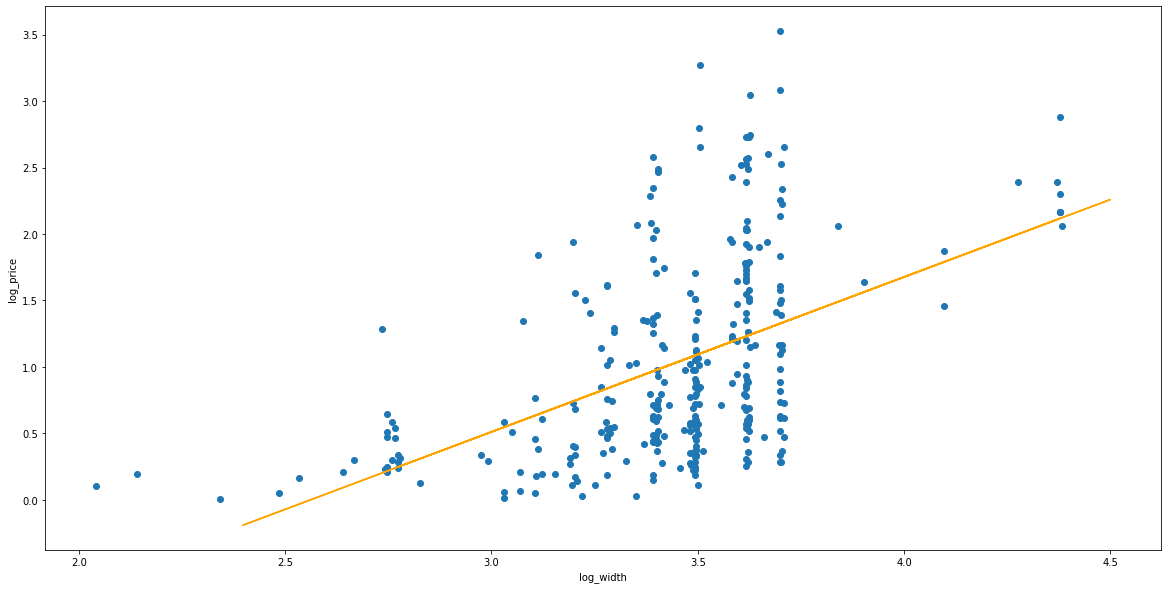

In [43]:
# Linear Regression plot for this model 3
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'orange')
plt.xlabel("log_width")
plt.ylabel("log_price")
plt.show()

In [44]:
#calculating RMSE
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.7725163537150288


In [45]:
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)

0.617090379577124


In [46]:
# Multivariate Linear Regression model 

X = monetdataset[['SIGNED','PICTURE', 'HOUSE ','log_WIDTH', 'log_HEIGHT','log_SIZE']].values
y= monetdataset['log_PRICE'].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [48]:
lr_model4 = linear_model.LinearRegression()
lr_model4.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = lr_model4.predict(X_test)

In [50]:
price_data = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_data

,Actual Price,Predicted Price
0,0.646056,1.264055
1,0.634458,0.731277
2,0.566889,1.155242
3,0.301585,0.655573
4,1.556564,1.133473
...,...,...
103,1.458615,1.260412
104,1.098612,1.089426
105,0.266094,0.764677
106,2.865996,0.835492


In [51]:
#Calculate RMSE
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.6921640821860559


In [52]:
#Calculating mean absolute error
mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)

0.5383370901785762
